# DAV 6150 Module 8 Assignment
# Classification via KNN & SVM

## Introduction:  
Like many industries, the insurance industry is always interested in broadening its relationships with existing customers. To that end, insurance companies will often attempt to sell additional products to their existing customers. For example, if you have a homeowner’s policy with a particular insurance company, they will likely try to also sell you an auto insurance policy, or perhaps a water damage supplemental policy to your homeowner’s policy, etc. You’ve been tasked by a large insurance company with the development of a model 
that can predict whether or not a given existing customer is likely to purchase an additional insurance product from the company. The insurance company plans to use the output of such a model in an attempt to improve its customer retention and sales practices.

The data set is comprised of more than 14,000 observations of 1 response/dependent variable (which indicates whether or not the new insurance product was purchased) and 14 explanatory/independent variables. The insurance company gathered data about customers to whom they offered the new product. You are given information about whether they did or did not sign up for the new product, together with some 
customer information and information about their buying behavior of two other products.

In [2]:
# load pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/675874815/DAV-5401/master/M7_Data.csv')
data.head()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


## Data Summary
1. ID: Unique customer identifier
2. TARGET: Indicator of buying the new product (0 = no, 1= yes)
3. Loyalty: Loyalty level, from low to high (0 to 3), 99 = unclassified
4. Age: Age in years
5. City: Unique code per city
6. Age_p: Age of partner in years
7. LOR Length: of relationship in years
8. LOR_m Length: of relationship in months
9. Prod_A Bought: Product A (0=no, 1=yes)
10. Type_A: Type of product A
11. Turnover_A: Amount of money spent on Product A
12. Prod_B: Bought Product B (0=no, 1=yes)
13. Type_B: Type of product B
14. Turnover_B: Amount of money spent on Product B
15. Contract: Type of contract

## Exploratory Data Analysis

According to our domain knowledge, 'age', 'age_p', 'lor_leng', 'lor_m length', 'turnover_A', 'turnover_B' belong to numerical variables, others belong to categorical variables, so we will use histograms, box plots for numerical variables, and use bar plots for others. Since 'ID' has no analytical value and the values of 'contract' are all the same, we will not discuss them here.

Numerical Variables:
1. Age 

2. Age_p

3. LOR_Leng

4. LOR_m_Length

5. Turnover_A

6. Turnover_B

Categorical Variables:

1. TARGET

2. Loyalty

3. City

4. Prod_A Bought

5. Type_A

6. Prod_B

7. Type_B

In [4]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   ID          14016 non-null  int64  
 3   age         14016 non-null  int64  
 4   city        14016 non-null  int64  
 5   LOR         14016 non-null  int64  
 6   prod_A      14016 non-null  int64  
 7   type_A      14016 non-null  int64  
 8   type_B      14016 non-null  int64  
 9   prod_B      14016 non-null  int64  
 10  turnover_A  14016 non-null  float64
 11  turnover_B  14016 non-null  float64
 12  contract    14016 non-null  int64  
 13  age_P       14016 non-null  int64  
 14  lor_M       14016 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.6+ MB


In [5]:
data.describe()

,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
count,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.0,14016.000000,14016.000000
mean,50.381778,37672.440068,35.882920,-710.950128,0.926299,0.533818,1.607877,1.918878,0.599458,379.161320,328.628207,2.0,35.882920,14.115582
std,48.471790,44855.639209,12.974634,26702.329184,0.965212,0.498873,1.508991,1.686038,0.490026,92.612207,475.616525,0.0,12.974634,11.582550
min,0.000000,1.000000,5.000000,-999999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.095909,191.962852,2.0,5.000000,3.000000
25%,2.000000,6741.500000,25.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.919412,219.406925,2.0,25.000000,3.000000
50%,3.000000,13514.500000,33.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,367.891493,237.656757,2.0,33.000000,15.000000
75%,99.000000,62738.000000,43.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,399.744923,264.131538,2.0,43.000000,15.000000
max,99.000000,151811.000000,102.000000,235.000000,6.000000,1.000000,6.000000,9.000000,1.000000,5568.784139,12249.084770,2.0,102.000000,75.000000


In [6]:
data_num = data[['age','age_P','LOR','lor_M','turnover_A','turnover_B']]

In [7]:
data_cat= data[['loyalty','city','prod_A','type_A','prod_B','type_B','TARGET']]

In [8]:
# turn the names of columns into list
column_num=data_num.columns.to_list()
column_cat=data_cat.columns.to_list()

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-p

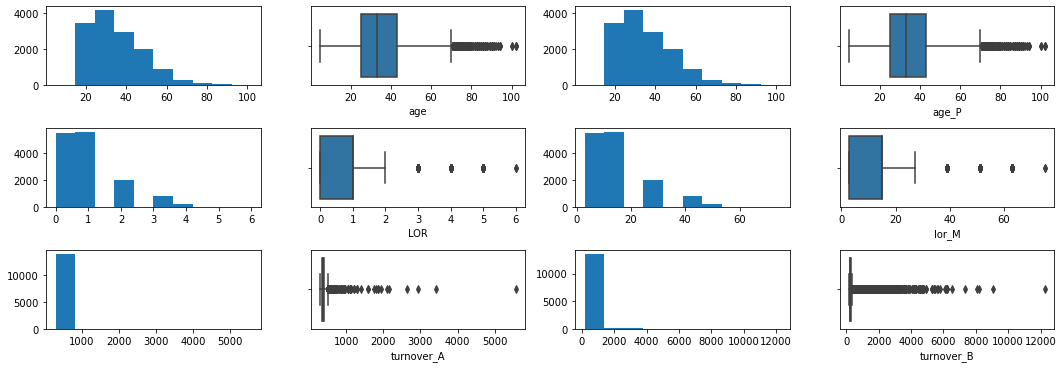

In [9]:
#show the histogram and boxplot of each attribute in the numerical dataset
fig=plt.figure(figsize=(15,20))
for i in range(6):
    n=2*i
    plt.subplot(12,4,n+1)
    plt.hist(data_num[column_num[i]])
    plt.subplot(12,4,n+2)
    sns.boxplot(data_num[column_num[i]])
    
plt.tight_layout()

From the above plots, we can see that 'age and 'age_P' skew right, 'age', 'age_P', 'turnover_A' and 'turnover_B' have many outliers, 'LOR' and 'LOR_M' is discontinuous in some ranges.

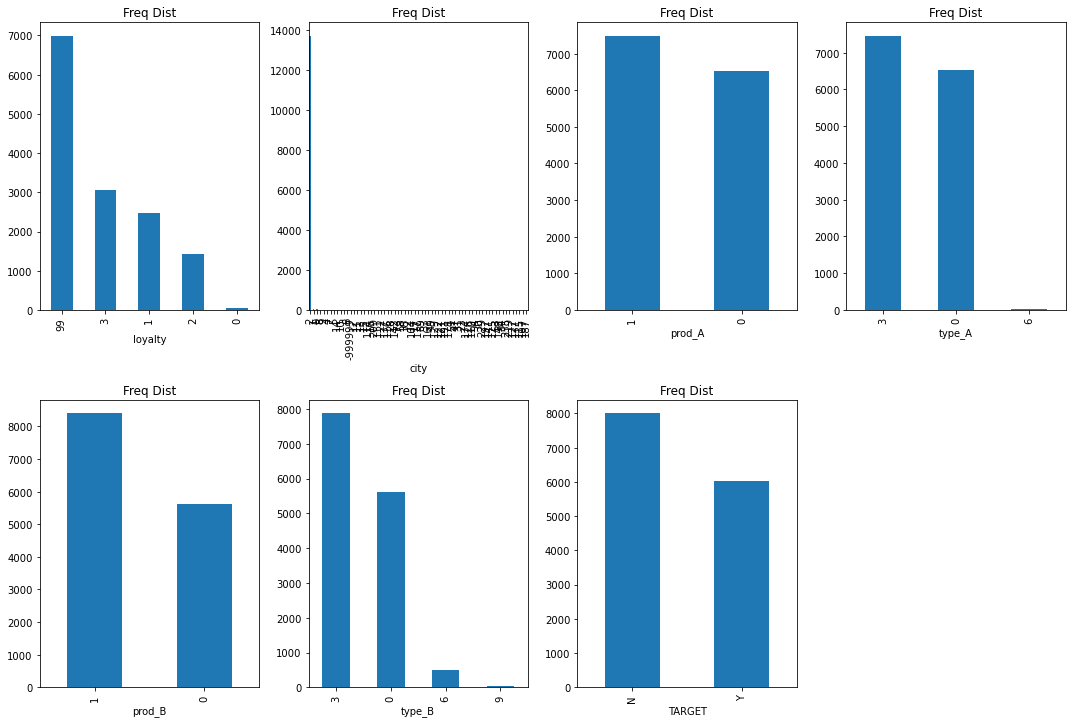

In [10]:
# show barplot of each attribute in the categorical dataset
fig=plt.figure(figsize=(15,15))
for i in range(7):
    plt.subplot(3,4,i+1)
    data_cat[column_cat[i]].value_counts().plot.bar(title = "Freq Dist")
    plt.xlabel(column_cat[i])
plt.tight_layout()

In [11]:
data['city'].value_counts()

2      13720
1         28
0         26
8         21
9         20
       ...  
127        1
131        1
115        1
107        1
187        1
Name: city, Length: 65, dtype: int64

In the chart of 'loyalty', the '99' appears mostly followed by '3', '1', and '2', '0' appears the lowest number of times.

In the 'prod_A', there are nearly 7500 people who have bought product A and there are about 6500 people who have not.

In the 'type_A', there are nearly 7470 people have bought the type '3', and only 30 people bought the type '6'.

In the 'prod_B', there are nearly 8400 people who have bought product B and there are about 5600 people who have not.

In the 'type_B', type 3 appears the most number, and type 9 appears the least number.

In the 'TARGET', we find that there are nearly 6000 people have bought the new product and other 8000 have not.

In the 'city', most cities gathered at the '2'.

In [12]:
# find null values
data.isnull().sum()

TARGET        0
loyalty       0
ID            0
age           0
city          0
LOR           0
prod_A        0
type_A        0
type_B        0
prod_B        0
turnover_A    0
turnover_B    0
contract      0
age_P         0
lor_M         0
dtype: int64

We can see there is no null value in the data set.

In [13]:
# check for duplicate use cases
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14011     True
14012     True
14013     True
14014     True
14015     True
Length: 14016, dtype: bool

We can see there are many duplicates in the data set.

In [14]:
# View the correlation coefficient between numerical variables
data_num.corr()

,age,age_P,LOR,lor_M,turnover_A,turnover_B
age,1.000000,1.000000,0.089640,0.089640,0.135887,0.251625
age_P,1.000000,1.000000,0.089640,0.089640,0.135887,0.251625
LOR,0.089640,0.089640,1.000000,1.000000,0.009987,0.158571
lor_M,0.089640,0.089640,1.000000,1.000000,0.009987,0.158571
turnover_A,0.135887,0.135887,0.009987,0.009987,1.000000,0.128613
turnover_B,0.251625,0.251625,0.158571,0.158571,0.128613,1.000000


From the above, we discover that Age is nearly 100% correlated with Age_p, LOR is highly correlated with LOR_m.

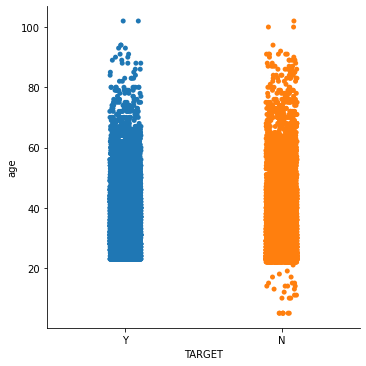

In [15]:
sns.catplot(x="TARGET", y="age", data=data)

From this plot, we can see that people who are under 20 are more likely not to buy this new product.

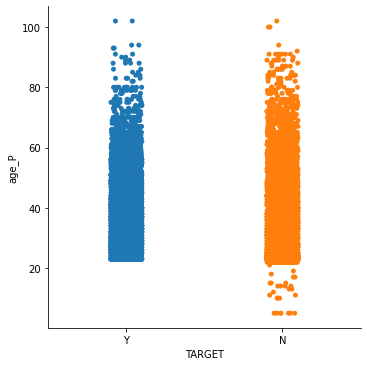

In [16]:
sns.catplot(x="TARGET", y="age_P", data=data)

From this plot, we can see that people who are under 20 are more likely not to buy this new product.

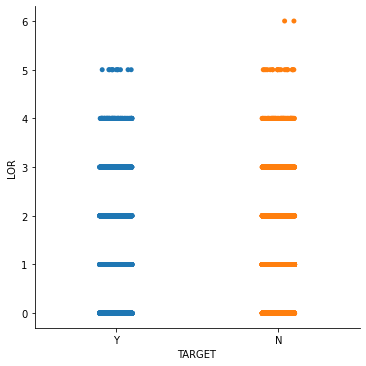

In [17]:
sns.catplot(x="TARGET", y="LOR", data=data)

From this plot, we can see that people who have over 6 years length of relationship are more likely not to buy this new product.

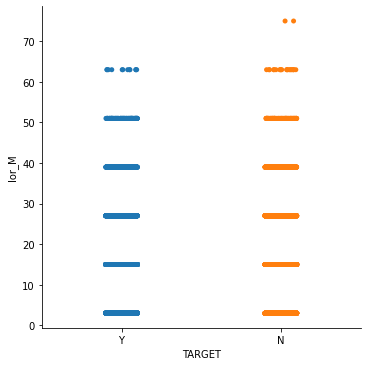

In [18]:
sns.catplot(x="TARGET", y="lor_M", data=data)

From this plot, we can see that people who have over 70 months length of relationship are more likely not to buy this new product.

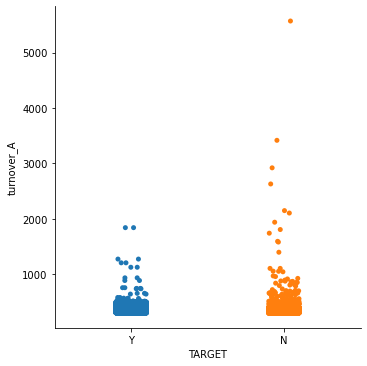

In [19]:
sns.catplot(x="TARGET", y="turnover_A", data=data)

From this plot, we can see that people who spend over 2000 on product A are more likely not to buy this new product.

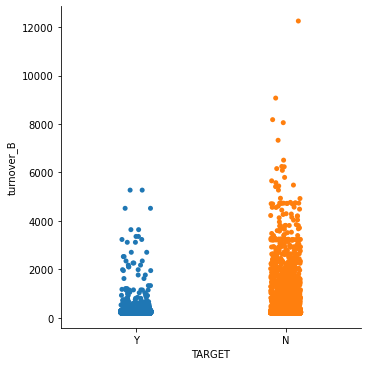

In [20]:
sns.catplot(x="TARGET", y="turnover_B", data=data)

From this plot, we can see that people who spend over 6000 on product B are more likely not to buy this new product.

<AxesSubplot:xlabel='loyalty', ylabel='count'>

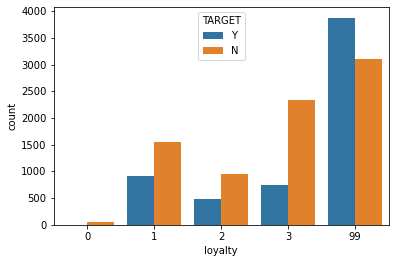

In [21]:
sns.countplot(x="loyalty", hue="TARGET", data=data)

From this plot, we can see that people who have loyalties 0-3 are more likely not to buy this new product, people who have unclassified loyalties are more likely to buy this new product.

<AxesSubplot:xlabel='city', ylabel='count'>

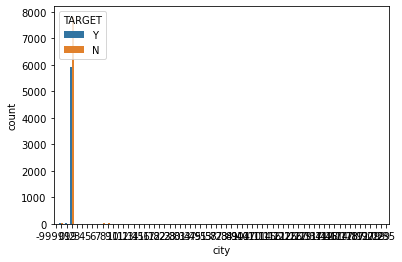

In [22]:
sns.countplot(x="city", hue="TARGET", data=data)

From this plot, we can see that people in city 2 are more likely not to buy this new product.

<AxesSubplot:xlabel='prod_A', ylabel='count'>

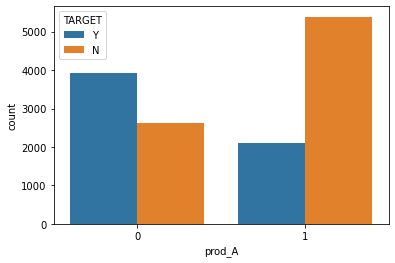

In [23]:
sns.countplot(x="prod_A", hue="TARGET", data=data)

From this plot, we can see that people who bought product A are more likely not to buy this new product, people who didn't buy product A are more likely to buy this new product.

<AxesSubplot:xlabel='type_A', ylabel='count'>

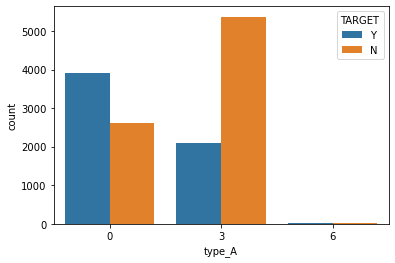

In [24]:
sns.countplot(x="type_A", hue="TARGET", data=data)

From this plot, we can see that people who have type A0 are more likely to buy this new product, and people who have type A3 are more likely not to buy this new product.

<AxesSubplot:xlabel='prod_B', ylabel='count'>

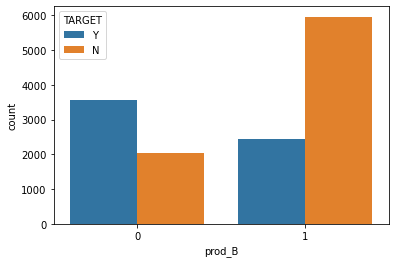

In [25]:
sns.countplot(x="prod_B", hue="TARGET", data=data)

From this plot, we can see that people who bought product B are more likely not to buy this new product, people who didn't buy product B are more likely to buy this new product.

<AxesSubplot:xlabel='type_B', ylabel='count'>

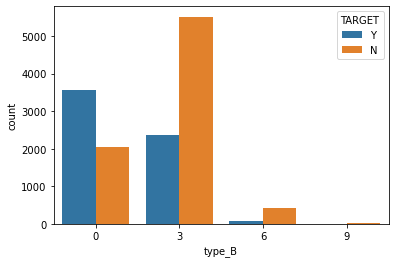

In [26]:
sns.countplot(x="type_B", hue="TARGET", data=data)

From this plot, we can see that people who have type B0 are more likely to buy this new product, people who have type B3 and B6 are more likely not to buy this new product.

## Data Preparation

In [27]:
data.shape

(14016, 15)

In [28]:
# drop all duplicative use cases
data1 = data.drop_duplicates()
data1

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,N,1,16793,33,2,2,1,3,3,1,302.380331,229.457986,2,33,27
11004,N,99,16794,23,2,0,0,0,0,0,316.268616,228.518505,2,23,3
11005,N,1,16798,23,2,2,1,3,3,1,385.871241,236.665515,2,23,27
11006,N,99,16800,32,2,1,1,3,3,1,317.578868,226.899614,2,32,15


In the 'city' column, 'city 2' far exceeds other values, so we divide the 'city' column into two columns that are city2 and not city2.

In [29]:
data1['city'].loc[data['city'] != 2] = 0
data1['city'].loc[data['city'] == 2] = 1

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-29-815c172fcda9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['city'].loc[data['city'] != 2] = 0
C:\Users\asus\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, valu

In [30]:
# replace 99 with 4 in 'loyalty' column
data1.loyalty.replace(99,4,inplace = True)
data1

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,4,77,66,1,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,1,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,1,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,4,303,31,1,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,4,306,62,1,0,0,0,0,0,384.577469,287.008370,2,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,N,1,16793,33,1,2,1,3,3,1,302.380331,229.457986,2,33,27
11004,N,4,16794,23,1,0,0,0,0,0,316.268616,228.518505,2,23,3
11005,N,1,16798,23,1,2,1,3,3,1,385.871241,236.665515,2,23,27
11006,N,4,16800,32,1,1,1,3,3,1,317.578868,226.899614,2,32,15


In [31]:
data1.describe()

,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
count,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.0,11008.000000,11008.000000
mean,2.968932,27023.459938,34.845203,0.978289,0.982649,0.584393,1.759448,2.097929,0.652253,372.332403,344.120565,2.0,34.845203,14.791788
std,1.159622,38576.841141,13.032781,0.145746,0.939415,0.492849,1.490133,1.671441,0.476277,96.685932,524.372413,0.0,13.032781,11.272981
min,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.095909,191.962852,2.0,5.000000,3.000000
25%,2.000000,5480.000000,24.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,332.229899,218.302029,2.0,24.000000,3.000000
50%,3.000000,11025.500000,31.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,361.930298,235.025216,2.0,31.000000,15.000000
75%,4.000000,16632.250000,42.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,391.567662,253.759401,2.0,42.000000,15.000000
max,4.000000,151811.000000,102.000000,1.000000,6.000000,1.000000,6.000000,9.000000,1.000000,5568.784139,12249.084770,2.0,102.000000,75.000000


From the above chart and corr() for numerical variables, we can see that the variances of 'city' and 'contract' are really low, the correlation coefficient between 'age' and 'age_P' is 1, the correlation coefficient between 'LOR' and 'lor_M' is 1, too, and 'ID' has no values for our further models, so we drop "ID", "city", "contract", "age_P", "lor_M" columns below.

In [32]:
data1.drop(["ID","city","contract","age_P","lor_M"],axis=1,inplace=True)

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
data1

,TARGET,loyalty,age,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B
0,Y,4,66,0,0,0,0,0,333.561114,264.721010
1,Y,1,45,3,1,3,3,1,394.735699,284.904978
2,Y,1,42,2,1,3,6,1,342.180990,1175.589721
3,Y,4,31,0,0,0,0,0,453.757916,242.341754
4,Y,4,62,0,0,0,0,0,384.577469,287.008370
...,...,...,...,...,...,...,...,...,...,...
11003,N,1,33,2,1,3,3,1,302.380331,229.457986
11004,N,4,23,0,0,0,0,0,316.268616,228.518505
11005,N,1,23,2,1,3,3,1,385.871241,236.665515
11006,N,4,32,1,1,3,3,1,317.578868,226.899614


In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
# Standardized numeric variables
scaler = StandardScaler()
a = scaler.fit_transform(data1.iloc[:,[2,3,8,9]])
a

array([[ 2.39060344, -1.04606962, -0.4010206 , -0.15142513],
       [ 0.7792088 ,  2.14755182,  0.23172258, -0.11293172],
       [ 0.54900956,  1.08301134, -0.31186319,  1.58571829],
       ...,
       [-0.90891893,  1.08301134,  0.1400354 , -0.20493056],
       [-0.21832122,  0.01847086, -0.56632874, -0.22355538],
       [-0.90891893,  2.14755182, -0.24096181, -0.26413566]])

In [36]:
b= pd.concat([data1,pd.DataFrame(a)], axis=1)
b

,TARGET,loyalty,age,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,0,1,2,3
0,Y,4,66,0,0,0,0,0,333.561114,264.721010,2.390603,-1.046070,-0.401021,-0.151425
1,Y,1,45,3,1,3,3,1,394.735699,284.904978,0.779209,2.147552,0.231723,-0.112932
2,Y,1,42,2,1,3,6,1,342.180990,1175.589721,0.549010,1.083011,-0.311863,1.585718
3,Y,4,31,0,0,0,0,0,453.757916,242.341754,-0.295054,-1.046070,0.842203,-0.194105
4,Y,4,62,0,0,0,0,0,384.577469,287.008370,2.083671,-1.046070,0.126654,-0.108920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,N,1,33,2,1,3,3,1,302.380331,229.457986,-0.141588,1.083011,-0.723531,-0.218676
11004,N,4,23,0,0,0,0,0,316.268616,228.518505,-0.908919,-1.046070,-0.579881,-0.220468
11005,N,1,23,2,1,3,3,1,385.871241,236.665515,-0.908919,1.083011,0.140035,-0.204931
11006,N,4,32,1,1,3,3,1,317.578868,226.899614,-0.218321,0.018471,-0.566329,-0.223555


In [37]:
# drop the duplicated columns
b.drop(['age','LOR','turnover_A','turnover_B'],axis=1,inplace=True)

In [38]:
b

,TARGET,loyalty,prod_A,type_A,type_B,prod_B,0,1,2,3
0,Y,4,0,0,0,0,2.390603,-1.046070,-0.401021,-0.151425
1,Y,1,1,3,3,1,0.779209,2.147552,0.231723,-0.112932
2,Y,1,1,3,6,1,0.549010,1.083011,-0.311863,1.585718
3,Y,4,0,0,0,0,-0.295054,-1.046070,0.842203,-0.194105
4,Y,4,0,0,0,0,2.083671,-1.046070,0.126654,-0.108920
...,...,...,...,...,...,...,...,...,...,...
11003,N,1,1,3,3,1,-0.141588,1.083011,-0.723531,-0.218676
11004,N,4,0,0,0,0,-0.908919,-1.046070,-0.579881,-0.220468
11005,N,1,1,3,3,1,-0.908919,1.083011,0.140035,-0.204931
11006,N,4,1,3,3,1,-0.218321,0.018471,-0.566329,-0.223555


In [39]:
b.columns = ['TARGET','loyalty','prod_A','type_A','type_B','prod_B','age','LOR','turnover_A','turnover_B']
b

,TARGET,loyalty,prod_A,type_A,type_B,prod_B,age,LOR,turnover_A,turnover_B
0,Y,4,0,0,0,0,2.390603,-1.046070,-0.401021,-0.151425
1,Y,1,1,3,3,1,0.779209,2.147552,0.231723,-0.112932
2,Y,1,1,3,6,1,0.549010,1.083011,-0.311863,1.585718
3,Y,4,0,0,0,0,-0.295054,-1.046070,0.842203,-0.194105
4,Y,4,0,0,0,0,2.083671,-1.046070,0.126654,-0.108920
...,...,...,...,...,...,...,...,...,...,...
11003,N,1,1,3,3,1,-0.141588,1.083011,-0.723531,-0.218676
11004,N,4,0,0,0,0,-0.908919,-1.046070,-0.579881,-0.220468
11005,N,1,1,3,3,1,-0.908919,1.083011,0.140035,-0.204931
11006,N,4,1,3,3,1,-0.218321,0.018471,-0.566329,-0.223555


In [40]:
# encode the values in 'TARGET' column
from sklearn.preprocessing import LabelEncoder
b.iloc[:,0] = LabelEncoder().fit_transform(b.iloc[:,0])

In [41]:
b

,TARGET,loyalty,prod_A,type_A,type_B,prod_B,age,LOR,turnover_A,turnover_B
0,1,4,0,0,0,0,2.390603,-1.046070,-0.401021,-0.151425
1,1,1,1,3,3,1,0.779209,2.147552,0.231723,-0.112932
2,1,1,1,3,6,1,0.549010,1.083011,-0.311863,1.585718
3,1,4,0,0,0,0,-0.295054,-1.046070,0.842203,-0.194105
4,1,4,0,0,0,0,2.083671,-1.046070,0.126654,-0.108920
...,...,...,...,...,...,...,...,...,...,...
11003,0,1,1,3,3,1,-0.141588,1.083011,-0.723531,-0.218676
11004,0,4,0,0,0,0,-0.908919,-1.046070,-0.579881,-0.220468
11005,0,1,1,3,3,1,-0.908919,1.083011,0.140035,-0.204931
11006,0,4,1,3,3,1,-0.218321,0.018471,-0.566329,-0.223555


In [42]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
# convert 'type_A','type_B' to DUMMY VARIABLES
enc = OneHotEncoder(categories='auto').fit(b.iloc[:,[3,4]])
result = enc.transform(b.iloc[:,[3,4]]).toarray()
result

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [44]:
enc.get_feature_names()

array(['x0_0', 'x0_3', 'x0_6', 'x1_0', 'x1_3', 'x1_6', 'x1_9'],
      dtype=object)

In [45]:
c = pd.concat([b,pd.DataFrame(result)],axis=1)
c

,TARGET,loyalty,prod_A,type_A,type_B,prod_B,age,LOR,turnover_A,turnover_B,0,1,2,3,4,5,6
0,1,4,0,0,0,0,2.390603,-1.046070,-0.401021,-0.151425,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1,1,3,3,1,0.779209,2.147552,0.231723,-0.112932,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,1,1,3,6,1,0.549010,1.083011,-0.311863,1.585718,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,4,0,0,0,0,-0.295054,-1.046070,0.842203,-0.194105,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,4,0,0,0,0,2.083671,-1.046070,0.126654,-0.108920,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,0,1,1,3,3,1,-0.141588,1.083011,-0.723531,-0.218676,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11004,0,4,0,0,0,0,-0.908919,-1.046070,-0.579881,-0.220468,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11005,0,1,1,3,3,1,-0.908919,1.083011,0.140035,-0.204931,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11006,0,4,1,3,3,1,-0.218321,0.018471,-0.566329,-0.223555,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [46]:
# drop the duplicated columns
c.drop(['type_A','type_B'],axis=1,inplace=True)

In [47]:
c

,TARGET,loyalty,prod_A,prod_B,age,LOR,turnover_A,turnover_B,0,1,2,3,4,5,6
0,1,4,0,0,2.390603,-1.046070,-0.401021,-0.151425,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1,1,1,0.779209,2.147552,0.231723,-0.112932,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,1,1,1,0.549010,1.083011,-0.311863,1.585718,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,4,0,0,-0.295054,-1.046070,0.842203,-0.194105,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,4,0,0,2.083671,-1.046070,0.126654,-0.108920,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,0,1,1,1,-0.141588,1.083011,-0.723531,-0.218676,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11004,0,4,0,0,-0.908919,-1.046070,-0.579881,-0.220468,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11005,0,1,1,1,-0.908919,1.083011,0.140035,-0.204931,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11006,0,4,1,1,-0.218321,0.018471,-0.566329,-0.223555,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [48]:
c.columns = ['TARGET','loyalty','prod_A','prod_B','age','LOR','turnover_A','turnover_B',"A0","A3","A6","B0","B3","B6","B9"]
c

,TARGET,loyalty,prod_A,prod_B,age,LOR,turnover_A,turnover_B,A0,A3,A6,B0,B3,B6,B9
0,1,4,0,0,2.390603,-1.046070,-0.401021,-0.151425,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1,1,1,0.779209,2.147552,0.231723,-0.112932,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,1,1,1,0.549010,1.083011,-0.311863,1.585718,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,4,0,0,-0.295054,-1.046070,0.842203,-0.194105,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,4,0,0,2.083671,-1.046070,0.126654,-0.108920,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,0,1,1,1,-0.141588,1.083011,-0.723531,-0.218676,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11004,0,4,0,0,-0.908919,-1.046070,-0.579881,-0.220468,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11005,0,1,1,1,-0.908919,1.083011,0.140035,-0.204931,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11006,0,4,1,1,-0.218321,0.018471,-0.566329,-0.223555,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Prepped Data Review

In [49]:
c.describe()

,TARGET,loyalty,prod_A,prod_B,age,LOR,turnover_A,turnover_B,A0,A3,A6,B0,B3,B6,B9
count,11008.000000,11008.000000,11008.000000,11008.000000,1.100800e+04,1.100800e+04,1.100800e+04,1.100800e+04,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000
mean,0.273256,2.968932,0.584393,0.652253,1.796538e-15,1.497833e-15,-1.594256e-16,-6.405366e-17,0.415607,0.582304,0.002089,0.347747,0.608194,0.041061,0.002998
std,0.445651,1.159622,0.492849,0.476277,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,0.492849,0.493202,0.045664,0.476277,0.488176,0.198440,0.054673
min,0.000000,0.000000,0.000000,0.000000,-2.290114e+00,-1.046070e+00,-7.471591e-01,-2.901843e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,-8.321859e-01,-1.046070e+00,-4.147897e-01,-2.399521e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,1.000000,-2.950543e-01,1.847086e-02,-1.075914e-01,-2.080588e-01,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,4.000000,1.000000,1.000000,5.490096e-01,1.847086e-02,1.989548e-01,-1.723303e-01,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,4.000000,1.000000,1.000000,5.152994e+00,5.341173e+00,5.374813e+01,2.270429e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
c_num = c[['age','LOR','turnover_A','turnover_B']]

In [51]:
c_cat= c[['loyalty','prod_A','prod_B','A0','A3','A6','B0','B3','B6','B9','TARGET']]

In [52]:
# turn the name of columns into list
column_num=c_num.columns.to_list()
column_cat=c_cat.columns.to_list()

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-p

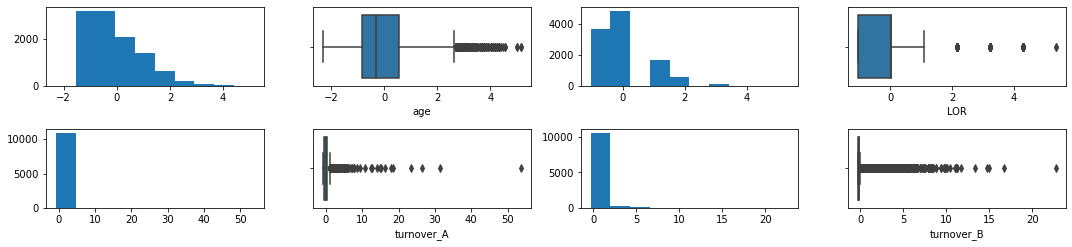

In [53]:
#show the histogram and boxplot of each attribute in the numerical dataset
fig=plt.figure(figsize=(15,20))
for i in range(4):
    n=2*i
    plt.subplot(12,4,n+1)
    plt.hist(c[column_num[i]])
    plt.subplot(12,4,n+2)
    sns.boxplot(c[column_num[i]])
    
plt.tight_layout()

From above, we can see the distributions of them are more Gaussian through our data preparation.

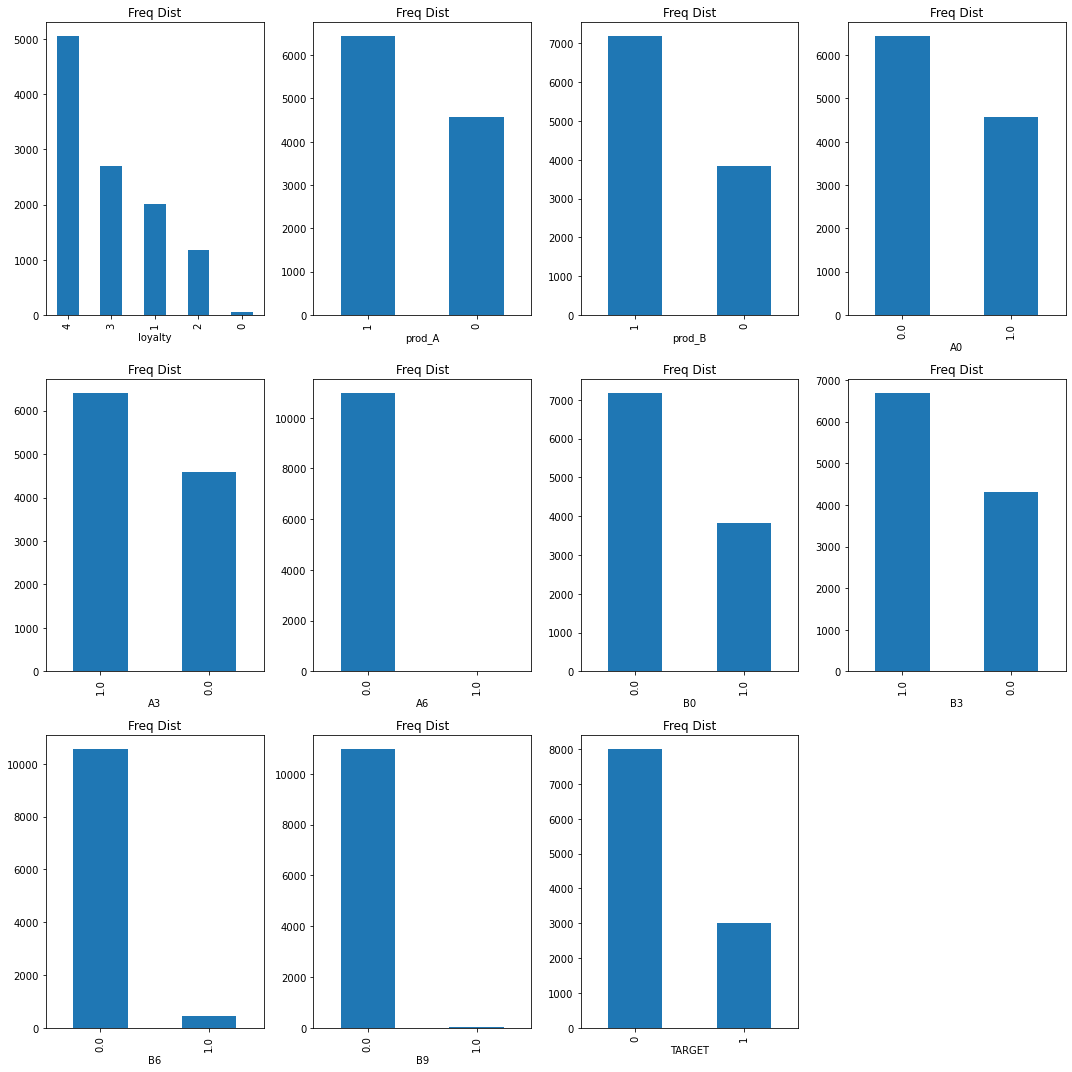

In [54]:
# show barplot of each attribute in the categorical dataset
fig=plt.figure(figsize=(15,15))
for i in range(11):
    plt.subplot(3,4,i+1)
    c_cat[column_cat[i]].value_counts().plot.bar(title = "Freq Dist")
    plt.xlabel(column_cat[i])
plt.tight_layout()

In the chart of 'loyalty', the '4' appears mostly followed by '3', '1', and '2', '0' appears the lowest number of times.

In the 'prod_A', there are over 6000 people who have bought product A and there are under 4000 people who have not.

In the 'prod_B', there are nearly 7000 people who have bought product B and there are about 4000 people who have not.

In the 'type_B', type 3 appears the most number, and type 9 appears the least number.

In the 'TARGET', we find that there are nearly 3000 people have bought the new product and other 8000 have not.

# KNN + SVM Modeling

In [68]:
x = c[['loyalty','prod_A','prod_B','age','LOR','turnover_A','turnover_B',"A0","A3","A6","B0","B3","B6","B9"]]
y = c.TARGET

In [69]:
from sklearn.feature_selection import mutual_info_classif as MIC

In [70]:
result = MIC(x,y)
result

array([0.02990161, 0.0479546 , 0.04210136, 0.06214314, 0.04295384,
       0.15455712, 0.13841907, 0.03970046, 0.04245061, 0.        ,
       0.04429851, 0.02943047, 0.00739307, 0.        ])

Through the mutual information method, we find that all x is related to Y, so we will select a few from x as our explanatory variables.

According to our domain knowledge, we set out the first data set including attributes that are relevant to product A and indicator of buying the new product(0 = no, 1= yes). 
The second data set includes attributes that are relevant with product B and indicator of buying the new product (0 = no, 1= yes).   

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x1=c[['prod_A','turnover_A',"A0","A3","A6"]]

In [73]:
x2=c[['prod_B','turnover_B',"B0","B3","B6",'B9']]

In [74]:
y=c['TARGET']

In [75]:
# Now split the data into training and testing subsets. 
# We'll set aside 30% of the data for testing purposes; Remember to make sure you specify a value for the inital random_state
# if you want to have the ability to reproduce the exact same training + testing subsets repeatedly
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state=12)

In [76]:
# Now split the data into training and testing subsets. 
# We'll set aside 30% of the data for testing purposes; Remember to make sure you specify a value for the inital random_state
# if you want to have the ability to reproduce the exact same training + testing subsets repeatedly
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.3, random_state=12)

### KNN Modeling

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#### KNN Model 1

0.8423091953442148 31


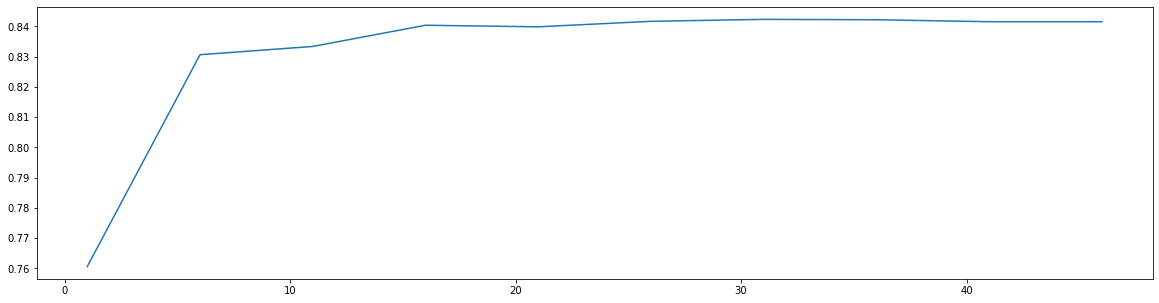

In [78]:
# use the learning curve to find the best K
scorel = []
for i in range(0,50,5):
    neigh1 = KNeighborsClassifier(n_neighbors=i+1)
    score = cross_val_score(neigh1,X1_train,y1_train,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*5)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,51,5),scorel)
plt.show()

From this line chart, we can see that when k = 31, we get the highest score of accuracy, so we will use k = 31 in our first KNN model.

In [79]:
knc1 = KNeighborsClassifier(n_neighbors=31)
knc1.fit(X1_train, y1_train)

KNeighborsClassifier(n_neighbors=31)

#### KNN Model 2

0.8308919096467735 36


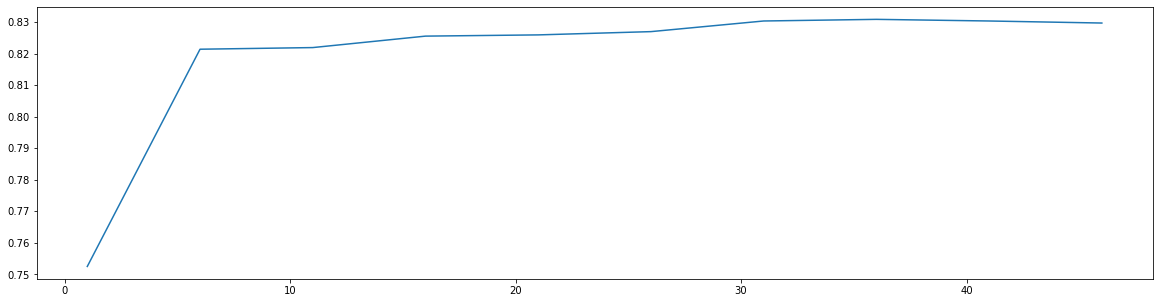

In [80]:
# use the learning curve to find the best K
score2 = []
for i in range(0,50,5):
    neigh2 = KNeighborsClassifier(n_neighbors=i+1)
    score = cross_val_score(neigh2,X2_train,y2_train,cv=10).mean()
    score2.append(score)
print(max(score2),(score2.index(max(score2))*5)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,51,5),score2)
plt.show()

From this line chart, we can see that when k = 36, we get the highest score of accuracy, so we will use k = 36 in our second KNN model.

In [81]:
knc2 = KNeighborsClassifier(n_neighbors=36)
knc2.fit(X2_train, y2_train)

KNeighborsClassifier(n_neighbors=36)

### SVM Modeling

In [82]:
from sklearn.svm import SVC

#### SVM Model 1
We decide to use two types of SVM models('linear', 'rbf') and select the better one through cross-validation scores.

In [83]:
li1 = SVC(kernel='linear')
score_li1 = cross_val_score(li1,X1_train,y1_train,cv=10).mean()
score_li1

0.8210232957703774

In [84]:
rb1 = SVC(kernel='rbf',gamma='auto')
score_rb1 = cross_val_score(rb1,X1_train,y1_train,cv=10).mean()
score_rb1

0.8273833948153013

We can see that the score of rb1 is higher than li1, so will use 'rbf' as kernel.

In [88]:
sv1 = SVC(kernel='rbf',gamma='auto')
sv1.fit(X1_train, y1_train)

SVC(gamma='auto')

#### SVM Model 2
We decide to use two types of SVM models('linear', 'rbf') and select the better one through cross-validation scores.

In [86]:
li2 = SVC(kernel='linear')
score_li2 = cross_val_score(li2,X2_train,y2_train,cv=10).mean()
score_li2

0.7232966125962234

In [87]:
rb2 = SVC(kernel='rbf',gamma='auto')
score_rb2 = cross_val_score(rb2,X2_train,y2_train,cv=10).mean()
score_rb2

0.7945510131891454

We can see that the score of rb2 is higher than li2, so will use 'rbf' as kernel.

In [89]:
sv2 = SVC(kernel='rbf',gamma='auto')
sv2.fit(X2_train, y2_train)

SVC(gamma='auto')

## Select Models

Because our response variable is an imbalanced class, so we use fl to evaluate our models.

In [91]:
score_knc1 = cross_val_score(knc1,X1_train,y1_train,cv=10,scoring='f1').mean()
score_knc1

0.6281521140200109

In [92]:
score_knc2 = cross_val_score(knc2,X2_train,y2_train,cv=10,scoring='f1').mean()
score_knc2

0.6099115438898725

In [93]:
score_sv1 = cross_val_score(sv1,X1_train,y1_train,cv=10,scoring='f1').mean()
score_sv1

0.5689767913546826

In [94]:
score_sv2 = cross_val_score(sv2,X2_train,y2_train,cv=10,scoring='f1').mean()
score_sv2

0.4088831307420433

From f1 scores, we know that knc1 is the best model in performance.

In [104]:
# predict class labels for the test set
predicted1 = knc1.predict(X1_test)
predicted1

array([0, 0, 0, ..., 0, 0, 0])

In [106]:
# generate class probabilities
probs1 = knc1.predict_proba(X1_test)
probs1

array([[0.96774194, 0.03225806],
       [0.80645161, 0.19354839],
       [0.64516129, 0.35483871],
       ...,
       [0.80645161, 0.19354839],
       [0.90322581, 0.09677419],
       [0.90322581, 0.09677419]])

In [107]:
from sklearn import metrics 
print(metrics.accuracy_score(y1_test, predicted1))
print(metrics.roc_auc_score(y1_test, probs1[:, 1]))

0.8477141992128369
0.8073890008334698


In [108]:
print(metrics.confusion_matrix(y1_test, predicted1))
print(metrics.classification_report(y1_test, predicted1))

[[2368   59]
 [ 444  432]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      2427
           1       0.88      0.49      0.63       876

    accuracy                           0.85      3303
   macro avg       0.86      0.73      0.77      3303
weighted avg       0.85      0.85      0.83      3303



Compared to the logistic regression model 1 in M7, the f1 score of the logistic regression model 1 is higher than the KNN model 1, so the logistic regression model is more suitable for this data set.

## Conclusion

Although KNN model 1 has the best predictive effect on the unseen data, but its accuracy is not very high, this indicates that we still have room for improving this model, for this assignment, mainly for selection of independent variables and using other more suitable models to try.